#预测一个国家将获得的奥运奖牌数量
#了解哪些因素（GDP、人口等）对预测奥运会成功最具有影响力
#数据集描述
#数据集（检查文件夹中的数据）包括：
    • iso：国家 ISO 代码
    • ioc：国际奥林匹克委员会代码
    • name：国家名称
    • continent：国家所在洲
    • pop：国家人口
    • gdp：国家国内生产总值 (GDP)
    • olympics_index：表示国家在奥运会上整体表现的指数
    • sports_index：表示国家体育基础设施和支持的指数
    • olympicsIndex：与奥运会表现相关的计算指数
    • sportsIndex：与体育相关的计算指数
    • total：获得的奖牌总数
    • gold：获得的金牌数量
    • silver：获得的银牌数量
    • bronze：获得的铜牌数量

项目步骤
1. 数据预处理
o 数据清理：处理缺失值、检查重复值并解决数据中的任何不一致问题。
o 特征工程：根据需要创建或修改特征（例如，GDP 和人口之间的相互作用）。根据需要对特征进行规范化或标准化。
o 数据拆分：将数据集分为训练集和测试集（例如，80% 训练，20% 测试）。
2. 探索性数据分析 (EDA)
o 描述性统计：计算数值特征的基本统计数据（平均值、中位数、标准差）。
o 可视化：创建图表以可视化特征和奖牌数量之间的关系。示例包括散点图、直方图和相关矩阵。
o 特征分析：确定哪些特征与赢得的奖牌数量具有最强的相关性。
3. 机器学习模型
o 线性回归：实现一个简单的线性回归模型来预测奖牌总数。使用平均绝对误差 (MAE) 和 R 平方等指标评估其性能。
o 决策树：使用决策树回归来模拟非线性关系。评估模型的性能并解释其预测。
o 随机森林：应用随机森林回归来提高预测准确性并处理复杂的特征交互。
4. 深度学习模型
o 神经网络：使用 TensorFlow 或 Keras 等库构建基本的前馈神经网络。尝试不同的架构，例如改变层数和神经元数。
o 超参数调整：调整超参数（例如学习率、时期数）以优化模型性能。
5. 模型评估
o 性能指标：使用 MAE、均方误差 (MSE) 和 R 平方评估所有模型的性能。
o 模型比较：比较机器学习模型（线性回归、决策树、随机森林）与深度学习模型（神经网络）的性能。
6. 解释和见解
o 特征重要性：分析哪些特征对预测奖牌数量影响最大。
o 模型解释：讨论不同模型的结果以及它们揭示了影响奥运会成功的因素。
7. 文档和演示
o 报告：撰写一份详细的报告，涵盖数据预处理、模型构建、评估和见解。包括可视化和解释。
o 演示：准备一份演示文稿，
总结主要发现和模型性能。包括视觉效果和关键要点。
可交付成果
• 包含数据预处理、模型训练和评估的 Python 脚本或 Jupyter 笔记本。
• 包含方法、发现和见解的详细
项目报告。
• 总结项目的演示幻灯片（上传 pdf）。
注意：这只是您项目的提示结构，您可以修改步骤，甚至可以创建分类模型。

1. 数据预处理
o 数据清理：处理缺失值、检查重复值并解决数据中的任何不一致问题。
o 特征工程：根据需要创建或修改特征（例如，GDP 和人口之间的相互作用）。根据需要对特征进行规范化或标准化。
o 数据拆分：将数据集分为训练集和测试集（例如，80% 训练，20% 测试）。

In [3]:
import pandas as pd
import numpy as np


# Load the dataset to inspect it
file_path = 'gni-olympics.csv'
olympic_data = pd.read_csv(file_path)

# Display the first few rows of the dataset
olympic_data.head()



,iso,ioc,name,continent,population,gdp,olympics_index,sports_index,olympicsIndex,sportsIndex,total,gold,silver,bronze
0,ARG,ARG,Argentina,South America,45376763,383066977654,19.597142,9.324537,19.597142,9.324537,3,0,1,2
1,ARM,ARM,Armenia,Asia,2963234,12645459214,19.681457,13.497324,19.681457,13.497324,4,0,2,2
2,AUS,AUS,Australia,Oceania,25687041,1330900925057,31.170099,11.073845,31.170099,11.073845,46,17,7,22
3,AUT,AUT,Austria,Europe,8917205,428965397959,12.212139,15.923033,12.212139,15.923033,7,1,1,5
4,AZE,AZE,Azerbaijan,Europe,10110116,42607176471,18.213838,13.103344,18.213838,13.103344,7,0,3,4


iso: 国家ISO代码
ioc: 国际奥委会代码
name: 国家名称
continent: 大洲
population: 人口
gdp: 国内生产总值
olympics_index 和 sports_index: 指数反映国家在奥运会及体育方面的表现
total, gold, silver, bronze: 国家赢得的奖牌数量

In [5]:
# 检查缺失值
missing_values = olympic_data.isnull().sum()
print("Missing Values:\n", missing_values)


Missing Values:
 iso               0
ioc               0
name              0
continent         5
population        0
gdp               0
olympics_index    2
sports_index      2
olympicsIndex     0
sportsIndex       0
total             0
gold              0
silver            0
bronze            0
dtype: int64


In [7]:
#缺失值处理
#鉴于continent为分类变量，手动结合国家名填充‘continent’信息
# 找到 continent 列缺失值的国家
missing_continent = olympic_data[olympic_data['continent'].isnull()][['name', 'continent']]
#利用布尔索引，筛选出 continent 列中 isnull() 为 True 的行
#双层中括号 [[]]：用于选择多列，返回的是一个新的 DataFrame（二维表格）
missing_continent

,name,continent
17,Côte d'Ivoire,NaN
57,Moldova,NaN
59,North Macedonia,NaN
80,Syria,NaN
91,Kosovo,NaN


In [9]:
# 填充 continent 缺失值
olympic_data.loc[olympic_data['name'] == "Côte d'Ivoire", 'continent'] = 'Africa'
olympic_data.loc[olympic_data['name'] == "Moldova", 'continent'] = 'Europe'
olympic_data.loc[olympic_data['name'] == "North Macedonia", 'continent'] = 'Europe'
olympic_data.loc[olympic_data['name'] == "Syria", 'continent'] = 'Asia'
olympic_data.loc[olympic_data['name'] == "Kosovo", 'continent'] = 'Europe'

#.loc 是行列的定位器，用来精确地修改数据。
#布尔条件用于筛选行，olympic_data['name'] == "Côte d'Ivoire" 是一个条件表达式。
#最后的 = 'Africa' 是赋值操作，将目标列的值替换为指定内容。

# 检查缺失值是否已填充
olympic_data['continent'].isnull().sum()


0

In [11]:
#处理olympics_index和sports_index缺失值
# 填充数值型缺失值为列的平均值
olympic_data['olympics_index'] = olympic_data['olympics_index'].fillna(olympic_data['olympics_index'].mean())
olympic_data['sports_index'] = olympic_data['sports_index'].fillna(olympic_data['sports_index'].mean())

#.fillna()这是 pandas 的方法，用于填充缺失值（NaN）。
#fillna(value) 的作用：
#找到当前列中所有缺失值（NaN）；用指定的值（value）替换这些缺失值

#olympic_data['olympics_index'].mean()
##计算 olympics_index 列的 平均值，用于填充缺失值

remaining_missing_values = olympic_data[['olympics_index', 'sports_index']].isnull().sum()
remaining_missing_values

olympics_index    0
sports_index      0
dtype: int64

In [30]:
#检查数据中其他不一致问题




remaining_columns:
 Index(['iso', 'ioc', 'name', 'continent', 'population', 'gdp',
       'olympics_index', 'sports_index', 'total', 'gold', 'silver', 'bronze'],
      dtype='object')


In [13]:
#处理Olympics_index中的异常值
# 查看 olympics_index 列的描述性统计
olympics_index_stats = olympic_data['olympics_index'].describe()
{"Descriptive Stats": olympics_index_stats}



{'Descriptive Stats': count     93.000000
 mean      20.677422
 std       12.493268
 min        1.000000
 25%       13.091179
 50%       18.787691
 75%       26.037386
 max      100.000000
 Name: olympics_index, dtype: float64}

olympics_index
20.677422    2
19.597142    1
23.730752    1
25.995830    1
11.299295    1
            ..
21.377148    1
18.787691    1
25.174413    1
13.091179    1
11.494291    1
Name: count, Length: 92, dtype: int64


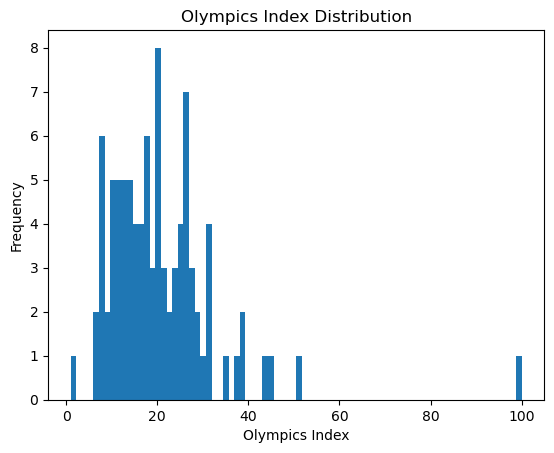

In [15]:
#在描述性统计发现问题后，使用直方图可视化分布，快速识别异常值，判断1和100是否明显偏离其他值
# 查看值的分布
print(olympic_data['olympics_index'].value_counts())

# 可视化分布
import matplotlib.pyplot as plt
plt.hist(olympic_data['olympics_index'], bins=80)
plt.title('Olympics Index Distribution')
plt.xlabel('Olympics Index')
plt.ylabel('Frequency')
plt.show()



In [54]:
#根据统计结果和可视化，筛选出异常值并进行修正
# 筛选出异常值的记录
outliers = olympic_data[(olympic_data['olympics_index'] == 100) | (olympic_data['olympics_index'] == 1)]
print(outliers)

# 替换异常值为中位数
median_value = olympic_data.loc[(olympic_data['olympics_index'] != 100) & 
                                (olympic_data['olympics_index'] != 1), 'olympics_index'].median()
olympic_data['olympics_index'] = olympic_data['olympics_index'].replace({100: median_value, 1: median_value})

#中位数替换异常值，保留数据完整性，且保持数据的整体分布形态
#但， 替换后的值可能缺乏业务逻辑
##例如，奥运表现指数可能需要根据国际奥委会的规则或历史数据重新计算，而不是简单替换为中位数。
##影响：替换后的值可能无法正确反映国家的奥运潜力，从而影响模型预测的解释性。

    iso  ioc        name continent  population            gdp  olympics_index  \
48  JPN  JPN       Japan      Asia   125836021  5064872875605           100.0   
75  SMR  SMR  San Marino    Europe       33938     1616369646             1.0   

    sports_index  olympicsIndex  sportsIndex  total  gold  silver  bronze  
48     10.606373          100.0    10.606373     58    27      14      17  
75     24.092659            1.0    24.092659      3     0       1       2  


In [19]:
#修正或处理完异常值后，重新查看描述性统计和分布
print(olympic_data['olympics_index'].describe())

count     93.000000
mean      20.677422
std       12.493268
min        1.000000
25%       13.091179
50%       18.787691
75%       26.037386
max      100.000000
Name: olympics_index, dtype: float64


In [21]:
#同理，对GDP进行异常值鉴别和处理
# 检查 GDP 列的描述性统计
gdp_stats = olympic_data['gdp'].describe()

# 定义异常值检测范围（基于 IQR 方法）
Q1 = olympic_data['gdp'].quantile(0.25)
Q3 = olympic_data['gdp'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 筛选异常值
gdp_outliers = olympic_data[(olympic_data['gdp'] < lower_bound) | (olympic_data['gdp'] > upper_bound)]

# 输出描述性统计和异常值记录
{
    "GDP Stats": gdp_stats,
    "IQR Lower Bound": lower_bound,
    "IQR Upper Bound": upper_bound,
    "GDP Outliers": gdp_outliers
}


{'GDP Stats': count    9.300000e+01
 mean     8.668410e+11
 std      2.702387e+12
 min      0.000000e+00
 25%      4.369766e+10
 50%      1.698354e+11
 75%      5.153325e+11
 max      2.093660e+13
 Name: gdp, dtype: float64,
 'IQR Lower Bound': -663754601254.5,
 'IQR Upper Bound': 1222784760157.5,
 'GDP Outliers':     iso  ioc           name      continent  population             gdp  \
 2   AUS  AUS      Australia        Oceania    25687041   1330900925057   
 12  BRA  BRA         Brazil  South America   212559409   1444733258972   
 14  CAN  CAN         Canada  North America    38005238   1643407977069   
 16  CHN  CHN          China           Asia  1402112000  14722730697890   
 21  DEU  GER        Germany         Europe    83240525   3806060140125   
 26  ESP  ESP          Spain         Europe    47351567   1281199091016   
 31  FRA  FRA         France         Europe    67391582   2603004395902   
 32  GBR  GBR  Great Britain         Europe    67215293   2707743777174   
 41  IND  

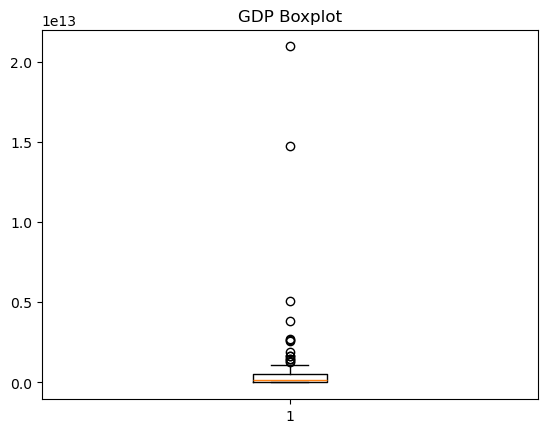

In [23]:
#可视化分布
import matplotlib.pyplot as plt
plt.boxplot(olympic_data['gdp'])
plt.title("GDP Boxplot")
plt.show()

In [25]:
#结合实际情况，对于合理异常值如美国、中国GDP保留，在描述性分析后实现标准化操作
#对于不合理异常值如叙利亚GDP=0，进行中位数替换
# 替换 GDP 为 0 的值（如 Syria）为 GDP 的中位数
gdp_median = olympic_data.loc[olympic_data['gdp'] > 0, 'gdp'].median()
olympic_data['gdp'] = olympic_data['gdp'].replace(0, gdp_median)

print(olympic_data['gdp'].describe())

count    9.300000e+01
mean     8.687724e+11
std      2.701825e+12
min      1.089204e+09
25%      4.523143e+10
50%      1.796228e+11
75%      5.153325e+11
max      2.093660e+13
Name: gdp, dtype: float64


In [27]:
# 检查重复值
duplicates = olympic_data.duplicated().sum()
print("Duplicate Count:", duplicates)

Duplicate Count: 0


In [29]:
# 删除重复的列：'olympicsIndex' 和 'sportsIndex'
# 保留主要的列 'olympics_index' 和 'sports_index'
columns_to_drop = ['olympicsIndex', 'sportsIndex']
cleaned_data = olympic_data.drop(columns=columns_to_drop)

# 检查删除后的列情况
remaining_columns = cleaned_data.columns

print("remaining_columns:\n", remaining_columns)

remaining_columns:
 Index(['iso', 'ioc', 'name', 'continent', 'population', 'gdp',
       'olympics_index', 'sports_index', 'total', 'gold', 'silver', 'bronze'],
      dtype='object')


In [33]:
# 查看当前数据的整体状态

# 输出数据框的基本信息（包括数据类型、非空值数量等）
data_info = cleaned_data.info()

# 输出前几行数据，查看数据的整体结构
data_head = cleaned_data.head()

# 输出各列的缺失值数量，查看是否还有需要处理的缺失值
missing_values_summary = cleaned_data.isnull().sum()

# 综合展示当前数据状态
{
    "Data Info": data_info,
    "Data Preview (First 5 Rows)": data_head,
    "Missing Values Summary": missing_values_summary
}


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   iso             93 non-null     object 
 1   ioc             93 non-null     object 
 2   name            93 non-null     object 
 3   continent       93 non-null     object 
 4   population      93 non-null     int64  
 5   gdp             93 non-null     float64
 6   olympics_index  93 non-null     float64
 7   sports_index    93 non-null     float64
 8   total           93 non-null     int64  
 9   gold            93 non-null     int64  
 10  silver          93 non-null     int64  
 11  bronze          93 non-null     int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 8.8+ KB


{'Data Info': None,
 'Data Preview (First 5 Rows)':    iso  ioc        name      continent  population           gdp  \
 0  ARG  ARG   Argentina  South America    45376763  3.830670e+11   
 1  ARM  ARM     Armenia           Asia     2963234  1.264546e+10   
 2  AUS  AUS   Australia        Oceania    25687041  1.330901e+12   
 3  AUT  AUT     Austria         Europe     8917205  4.289654e+11   
 4  AZE  AZE  Azerbaijan         Europe    10110116  4.260718e+10   
 
    olympics_index  sports_index  total  gold  silver  bronze  
 0       19.597142      9.324537      3     0       1       2  
 1       19.681457     13.497324      4     0       2       2  
 2       31.170099     11.073845     46    17       7      22  
 3       12.212139     15.923033      7     1       1       5  
 4       18.213838     13.103344      7     0       3       4  ,
 'Missing Values Summary': iso               0
 ioc               0
 name              0
 continent         0
 population        0
 gdp             

In [35]:
# 2. 特征工程
# 创建 GDP 和人口的交互项
cleaned_data['gdp_per_capita'] = cleaned_data['gdp'] / cleaned_data['population']
cleaned_data['gdp_per_capita']


0      8441.919439
1      4267.452120
2     51812.154037
3     48105.364625
4      4214.311336
          ...     
88    63543.577789
89     1685.764947
90    16964.445315
91     4287.200903
92     5090.715025
Name: gdp_per_capita, Length: 93, dtype: float64

In [37]:
#数据拆分
#防止过拟合、在训练集上训练模型，并在测试集上评估性能；
#通过在验证集上调整超参数，并在测试集上评估最终模型性能，课选最佳模型和参数
import pandas as pd
from sklearn.model_selection import train_test_split

# 定义特征和目标变量
X = cleaned_data[['population', 'gdp', 'gdp_per_capita', 'olympics_index', 'sports_index']]
y = cleaned_data['total']

# 拆分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 查看处理结果
{
    "X_train_shape": X_train.shape,
    "X_test_shape": X_test.shape
}


{'X_train_shape': (74, 5), 'X_test_shape': (19, 5)}

2. 探索性数据分析 (EDA)
o 描述性统计：计算数值特征的基本统计数据（平均值、中位数、标准差）。
o 可视化：创建图表以可视化特征和奖牌数量之间的关系。示例包括散点图、直方图和相关矩阵。
o 特征分析：确定哪些特征与赢得的奖牌数量具有最强的相关性。


In [39]:
# 计算数值特征的描述性统计
descriptive_stats = cleaned_data.describe()

# 输出描述性统计结果
print(descriptive_stats)

         population           gdp  olympics_index  sports_index       total  \
count  9.300000e+01  9.300000e+01       93.000000     93.000000   93.000000   
mean   6.639237e+07  8.687724e+11       20.677422     16.329262   11.612903   
std    2.057474e+08  2.701825e+12       12.493268      8.835266   19.091332   
min    3.393800e+04  1.089204e+09        1.000000      7.396478    1.000000   
25%    4.994724e+06  4.523143e+10       13.091179     11.019952    2.000000   
50%    1.132662e+07  1.796228e+11       18.787691     13.993115    4.000000   
75%    4.735157e+07  5.153325e+11       26.037386     18.984764   11.000000   
max    1.402112e+09  2.093660e+13      100.000000     72.227313  113.000000   

            gold     silver     bronze  gdp_per_capita  
count  93.000000  93.000000  93.000000       93.000000  
mean    3.655914   3.634409   4.322581    21197.538333  
std     7.022471   6.626339   6.210372    22534.999645  
min     0.000000   0.000000   0.000000      817.035757  
25%

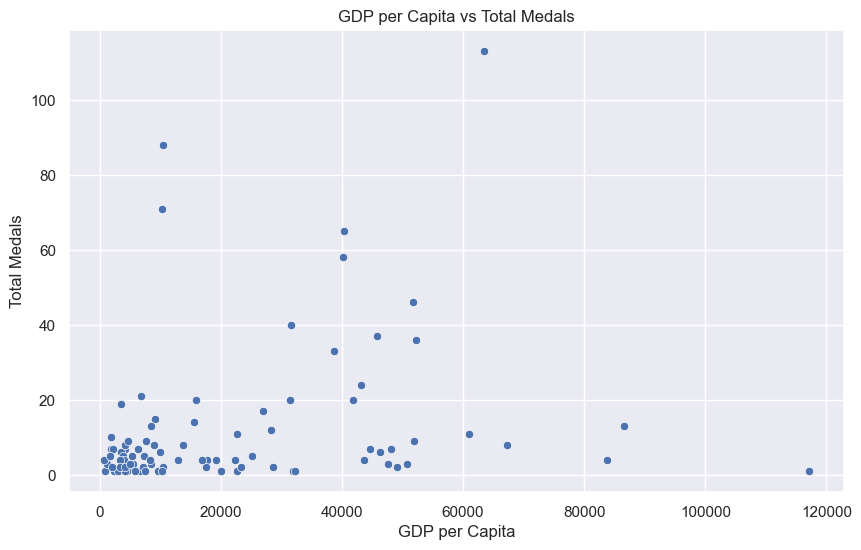

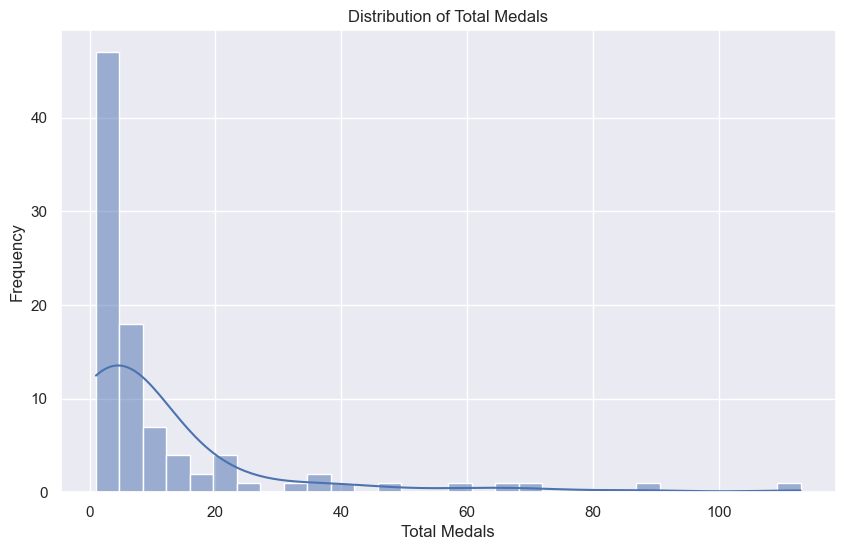

In [41]:
#可视化特征与奖牌数量关系
import matplotlib.pyplot as plt
import seaborn as sns
# 设置绘图风格
sns.set(style="darkgrid")


# 散点图：人均 GDP vs 奖牌总数
plt.figure(figsize=(10, 6))
sns.scatterplot(x='gdp_per_capita', y='total', data=cleaned_data)
plt.title('GDP per Capita vs Total Medals')
plt.xlabel('GDP per Capita')
plt.ylabel('Total Medals')
plt.show()

# 直方图：奖牌总数分布
plt.figure(figsize=(10, 6))
sns.histplot(cleaned_data['total'], bins=30, kde=True)
plt.title('Distribution of Total Medals')
plt.xlabel('Total Medals')
plt.ylabel('Frequency')
plt.show()


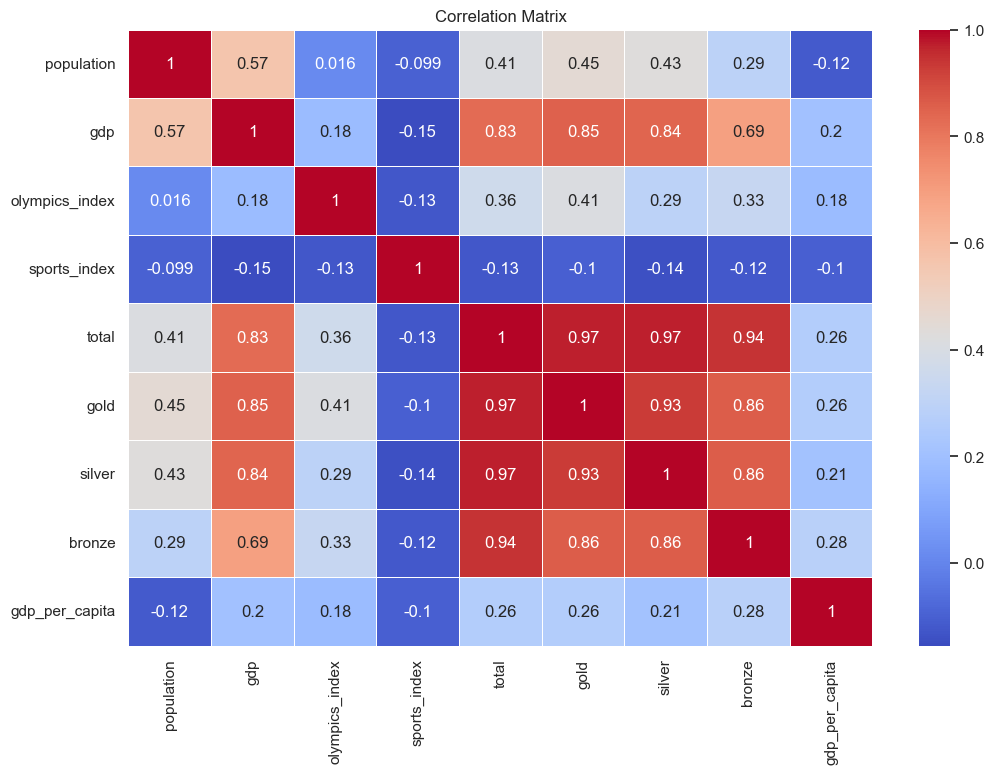

In [43]:
# 相关矩阵
# 选择数值型列
numeric_data = cleaned_data.select_dtypes(include=[np.number])

# 计算相关矩阵
correlation_matrix = numeric_data.corr()

# 可视化相关矩阵
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [45]:
#特征分析
#计算特征与奖牌数量间的相关系数
correlation_with_total = correlation_matrix['total'].sort_values(ascending=False)

print(correlation_with_total)

total             1.000000
gold              0.970840
silver            0.969439
bronze            0.941941
gdp               0.831455
population        0.410505
olympics_index    0.359767
gdp_per_capita    0.261251
sports_index     -0.126064
Name: total, dtype: float64


In [55]:
#标准化操作，需要计算距离的算法：

#例如，KNN、K-Means、PCA 等算法依赖于欧氏距离。
##若未标准化，范围较大的特征会主导距离计算，影响结果。
#梯度下降优化：
##梯度下降算法的收敛速度会因特征的量级差异而受到影响。
##标准化后的数据有助于算法快速收敛。

# 标准化特征：人口、GDP、gdp_per_capita、olympics_index、sports_index
from sklearn.preprocessing import StandardScaler
# 需要标准化的特征
features_to_scale = ['population', 'gdp', 'gdp_per_capita', 'olympics_index', 'sports_index']
data_to_scale = cleaned_data[features_to_scale]
#使用standardScaler对提取的特征进行标准化
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data_to_scale)

scaled_features_df = pd.DataFrame(scaled_features, columns=features_to_scale, index=cleaned_data.index)
other_features = cleaned_data.drop(columns=features_to_scale)

scaled_data= pd.concat([other_features,scaled_features_df],axis=1)
scaled_data.to_csv('scaled_data.csv',index=False)


In [59]:
cleaned_data.to_csv('cleaned_data.csv',index=False)

3. 机器学习模型
o 线性回归：实现一个简单的线性回归模型来预测奖牌总数。使用平均绝对误差 (MAE) 和 R 平方等指标评估其性能。
o 决策树：使用决策树回归来模拟非线性关系。评估模型的性能并解释其预测。
o 随机森林：应用随机森林回归来提高预测准确性并处理复杂的特征交互。


In [65]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

In [67]:
#线性回归模型
# 初始化线性回归模型
lin_reg = LinearRegression()

# 训练模型
lin_reg.fit(X_train, y_train)

# 预测
y_pred_lin = lin_reg.predict(X_test)

# 评估模型
mae_lin = mean_absolute_error(y_test, y_pred_lin)
r2_lin = r2_score(y_test, y_pred_lin)
mse_lin = mean_squared_error(y_test, y_pred_lin)

print(f'linearRegression - MAE:{mae_lin:.2f},R^2:{r2_lin:.2f}, MSE: {mse_lin:.2f}')

linearRegression - MAE:3.95,R^2:0.26, MSE: 25.16


DecisionTreeRegression - MAE: 8.79, MSE: 203.00, R²: -4.97


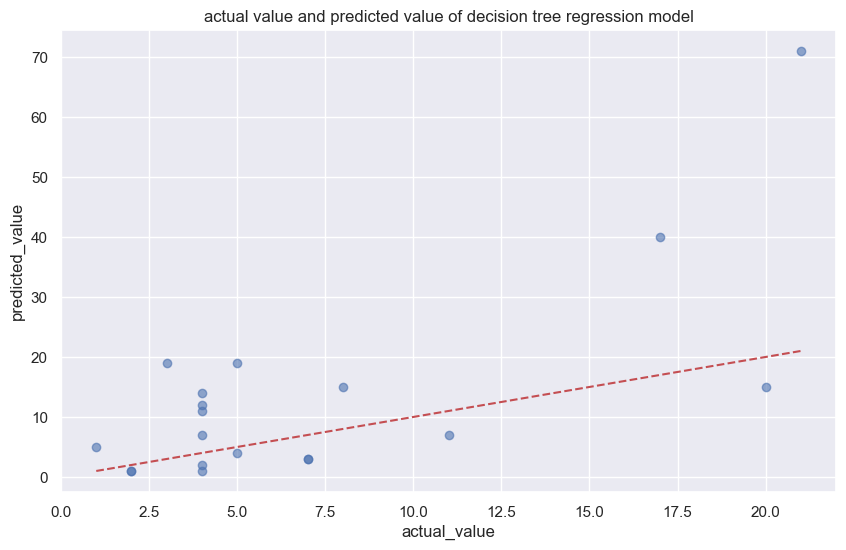

In [103]:
#决策树回归模型
# 初始化决策树回归模型
tree_reg = DecisionTreeRegressor(random_state=70)

# 在训练集上训练模型
tree_reg.fit(X_train, y_train)

# 预测
y_pred_tree = tree_reg.predict(X_test)

# 评估
mae_tree = mean_absolute_error(y_test, y_pred_tree)
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)
print(f'DecisionTreeRegression - MAE: {mae_tree:.2f}, MSE: {mse_tree:.2f}, R²: {r2_tree:.2f}')

#可视化实际值与预测值的关系，了解模型的预测效果
# 可视化实际值与预测值的散点图
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_tree, alpha=0.6)
plt.xlabel('actual_value')
plt.ylabel('predicted_value')
plt.title('actual value and predicted value of decision tree regression model')

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # 绘制 y=x 的参考线
plt.show()

In [77]:
#随机森林回归模型
# 初始化随机森林回归模型
forest_reg = RandomForestRegressor(n_estimators=100, random_state=50)

# 训练模型
forest_reg.fit(X_train, y_train)

# 预测
y_pred_forest = forest_reg.predict(X_test)

# 评估
mae_forest = mean_absolute_error(y_test, y_pred_forest)
mse_forest = mean_squared_error(y_test, y_pred_forest)
r2_forest = r2_score(y_test, y_pred_forest)

print(f'RandomForestRegressor - MAE: {mae_forest:.2f}, MSE: {mse_forest:.2f}, R²: {r2_forest:.2f}')

RandomForestRegressor - MAE: 5.00, MSE: 56.31, R²: -0.66


[0.06126615 0.77058158 0.05950765 0.07364654 0.03499808]


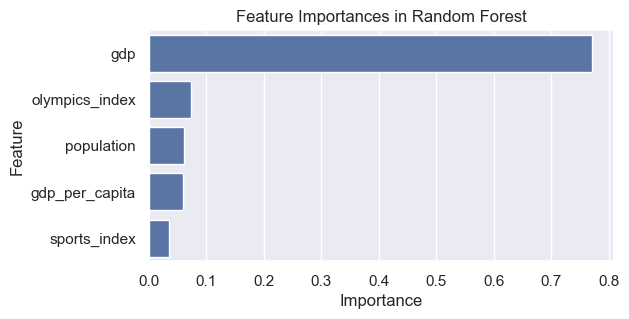

In [89]:
#特征重要性分析
#随机森林在拟合数据后，会对数据属性列进行变量重要性度量。feature_importance参数，数值越大的属性列对预测的准确性更加重要
# 定义特征列表
features = ['population', 'gdp', 'gdp_per_capita', 'olympics_index', 'sports_index']
# 获取特征重要性
feature_importances = forest_reg.feature_importances_
print(feature_importances)
# 创建 DataFrame
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# 可视化
plt.figure(figsize=(6, 3))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances in Random Forest')
plt.show()

In [105]:
pip install tensorflow

     ---------------------------------------- 0.0/48.7 kB ? eta -:--:--
     ---------------------------------------- 48.7/48.7 kB 1.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/390.3 MB ? eta -:--:--
   ---------------------------------------- 0.1/390.3 MB 2.4 MB/s eta 0:02:43
   ---------------------------------------- 0.2/390.3 MB 2.3 MB/s eta 0:02:51
   ---------------------------------------- 0.3/390.3 MB 2.1 MB/s eta 0:03:06
   ---------------------------------------- 0.4/390.3 MB 2.2 MB/s eta 0:02:58
   ---------------------------------------- 0.5/390.3 MB 2.3 MB/s eta 0:02:47
   ---------------------------------------- 0.6/390.3 MB 2.2 MB/s eta 0:02:56
   ---------------------------------------- 0.7/390.3 MB 2.3 MB/s eta 0:02:53
   ---------------------------------------- 0.8/390.3 MB 2.4 MB/s eta 0:02:46
   ---------------------------------------- 0.9/390.3 MB 2.2 MB/s eta 0:02:57
   ---------------------------------------- 1.1/390.3 MB 2.4 MB/s eta 0:02:

In [115]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Input
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd


In [129]:
# 特征列
features = ['population', 'gdp', 'gdp_per_capita', 'olympics_index', 'sports_index']
X = cleaned_data[features]
y = cleaned_data['total']  # 目标变量：奖牌总数

# 数据标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 将数据集拆分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=50)



# 构建前馈神经网络模型
model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))  # 使用 Input 定义输入形状
model.add(Dense(64, activation='relu'))  # 第一隐藏层
model.add(Dense(32, activation='relu'))  # 第二隐藏层
model.add(Dense(1))  # 输出层
# 编译模型
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae'])

# 训练模型
history = model.fit(X_train, y_train, epochs=100, batch_size=10, validation_split=0.2, verbose=1)
# 评估模型
loss, mae = model.evaluate(X_test, y_test, verbose=0)
print(f'Test MAE: {mae:.2f}')



Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 190.8611 - mae: 8.2048 - val_loss: 1200.1129 - val_mae: 19.4206
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 331.1291 - mae: 10.8842 - val_loss: 1174.1421 - val_mae: 19.1450
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 259.6745 - mae: 9.1797 - val_loss: 1149.3971 - val_mae: 18.9051
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 263.1611 - mae: 9.3902 - val_loss: 1123.0668 - val_mae: 18.6599
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 202.0023 - mae: 7.6009 - val_loss: 1094.9777 - val_mae: 18.4064
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 201.6236 - mae: 7.6723 - val_loss: 1063.5913 - val_mae: 18.1347
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 299.9976 - mae: 8.9103 - val_loss: 1029.0507 - val_mae: 17.8287
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 213.2185 - mae: 8.7013 - val_loss: 993.9120 - val_mae: 17.5125
Epoch 9/100
6/6 ━━━━━━━━━━

In [123]:
pip install keras-tuner

   ---------------------------------------- 0.0/129.1 kB ? eta -:--:--
   ------ -------------------------------- 20.5/129.1 kB 640.0 kB/s eta 0:00:01
   ------------------------- -------------- 81.9/129.1 kB 1.1 MB/s eta 0:00:01
   ---------------------------------------- 129.1/129.1 kB 1.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [133]:
import keras_tuner as kt

def build_model(hp):
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1],)))  # 输入形状
    # 调整第一层的神经元数量和激活函数
  
    model.add(Dense(units=hp.Int('units_1', min_value=32, max_value=256, step=32),
                    activation=hp.Choice('act_1', ['relu', 'tanh'])))
#通过 hp.Int，我们告诉程序尝试从 32 到 512 的神经元数量（步长为 32），以确定最佳值。
    # 调整第二层的神经元数量和激活函数
   
    model.add(Dense(units=hp.Int('units_2', min_value=32, max_value=256, step=32),
                    activation=hp.Choice('act_2', ['relu', 'tanh'])))
#输出层 
    model.add(Dense(1))
#hp.Choice 用于测试不同的激活函数（如 ReLU 和 tanh）。不同的激活函数可能对模型性能有显著影响。
    
    # 调整学习率
    model.compile(optimizer=Adam(learning_rate=hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG')),
                  loss='mean_squared_error',
                  metrics=['mae'])
    return model
#学习率控制梯度下降的步幅。hp.Float 让程序在 1e-4 到 1e-2 的范围内选择最佳学习率。

# 定义超参数搜索
tuner = kt.RandomSearch(build_model,
                        objective='val_mae',
                        max_trials=10,
                        executions_per_trial=2,
                        directory='my_dir',
                        project_name='intro_to_kt')
#RandomSearch：这是 Keras Tuner 提供的一种超参数优化方法，随机选择参数组合进行搜索。
#objective='val_mae'：优化的目标是验证集上的平均绝对误差（MAE），即最小化验证集误差。
#max_trials=10：设置最多尝试 10 次不同的超参数组合。
#executions_per_trial=2：每次实验重复 2 次，减少随机性带来的误差。

# 运行超参数搜索
tuner.search(X_train, y_train, epochs=50, validation_split=0.2)
#通过 tuner.search，Keras Tuner 开始尝试不同的超参数组合，训练模型，并评估每种组合的性能。
#epochs=50：每次模型训练 50 个周期。
#validation_split=0.2：20% 的训练数据用于验证。

# 获取最佳超参数并构建模型
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
model = tuner.hypermodel.build(best_hps)

# 训练使用最佳超参数的模型
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2)
#tuner.get_best_hyperparameters：提取搜索得到的最佳超参数。
#tuner.hypermodel.build(best_hps)：用最佳超参数构建最终的模型。
#用之前找到的最佳超参数对模型进行完整训练

# 评估模型
loss, mae = model.evaluate(X_test, y_test, verbose=0)
print(f'Test MAE after tuning: {mae:.2f}')


Reloading Tuner from my_dir\intro_to_kt\tuner0.json
Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 151ms/step - loss: 328.1589 - mae: 10.1961 - val_loss: 1204.4236 - val_mae: 19.1728
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 266.7500 - mae: 8.8640 - val_loss: 1145.1057 - val_mae: 18.5746
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 201.2594 - mae: 7.7189 - val_loss: 1077.4071 - val_mae: 17.8928
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 247.0448 - mae: 8.2070 - val_loss: 992.4749 - val_mae: 17.0164
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 267.7307 - mae: 8.5159 - val_loss: 895.4372 - val_mae: 16.0827
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 175.0909 - mae: 7.0542 - val_loss: 788.9009 - val_mae: 14.9868
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 237.9220 - mae: 8.3012 - val_loss: 673.5024 - val_mae: 13.7803
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 162.2811 - mae: 7.0019 - val_loss: 566

In [155]:
#使用 L2 正则化示例：
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam


# 构建模型
model = Sequential([
    Input(shape=(X_train.shape[1],)),  # 显式定义输入层
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),  # 第一隐藏层，带L2正则化
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),  # 第二隐藏层，带L2正则化
    Dense(1)  # 输出层
])

# 编译模型
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='mean_squared_error',
              metrics=['mae'])

# 训练模型
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2, batch_size=16)

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 212.1158 - mae: 8.6058 - val_loss: 1250.6364 - val_mae: 19.6626
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 201.8419 - mae: 8.2103 - val_loss: 1232.2926 - val_mae: 19.4468
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 265.9911 - mae: 9.1001 - val_loss: 1210.5535 - val_mae: 19.2565
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 204.2167 - mae: 8.1864 - val_loss: 1187.7152 - val_mae: 19.0532
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 232.6021 - mae: 8.5356 - val_loss: 1163.0754 - val_mae: 18.8259
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 306.8823 - mae: 9.8767 - val_loss: 1134.4956 - val_mae: 18.5685
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 224.0689 - mae: 8.2481 - val_loss: 1104.9954 - val_mae: 18.3126
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 233.8799 - mae: 7.5531 - val_loss: 1071.5822 - val_mae: 18.0156
Epoch 9/100
4/4 ━━━━━━━━

In [157]:
#正则化后，超参数优化步骤：
import keras_tuner as kt
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam

# 定义超参数搜索的模型构建函数
def build_model(hp):
    model = Sequential()
    # 输入层
    model.add(Input(shape=(X_train.shape[1],)))

    # 第一隐藏层
    model.add(Dense(
        units=hp.Int('units_1', min_value=64, max_value=256, step=32),  # 优化神经元数量
        activation='relu',
        kernel_regularizer=l2(hp.Float('l2_reg_1', min_value=1e-4, max_value=1e-2, sampling='LOG'))  # 优化L2正则化强度
    ))

    # 第二隐藏层
    model.add(Dense(
        units=hp.Int('units_2', min_value=32, max_value=128, step=32),  # 优化神经元数量
        activation='relu',
        kernel_regularizer=l2(hp.Float('l2_reg_2', min_value=1e-4, max_value=1e-2, sampling='LOG'))  # 优化L2正则化强度
    ))

    # 输出层
    model.add(Dense(1))

    # 编译模型
    model.compile(
        optimizer=Adam(learning_rate=hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG')),  # 优化学习率
        loss='mean_squared_error',
        metrics=['mae']
    )
    return model

# 定义超参数搜索
tuner = kt.RandomSearch(
    build_model,
    objective='val_mae',  # 优化验证集的MAE
    max_trials=10,  # 最大尝试次数
    executions_per_trial=2,  # 每个配置重复训练的次数
    directory='my_dir',
    project_name='l2_regularization_tuning'
)

# 开始超参数搜索
tuner.search(X_train, y_train, epochs=50, validation_split=0.2, batch_size=16)

# 输出最佳超参数
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Best hyperparameters: \n"
      f"units_1: {best_hps.get('units_1')}, l2_reg_1: {best_hps.get('l2_reg_1')}\n"
      f"units_2: {best_hps.get('units_2')}, l2_reg_2: {best_hps.get('l2_reg_2')}\n"
      f"learning_rate: {best_hps.get('learning_rate')}")


Reloading Tuner from my_dir\l2_regularization_tuning\tuner0.json
Best hyperparameters: 
units_1: 192, l2_reg_1: 0.0016234807421441969
units_2: 128, l2_reg_2: 0.002188989938568995
learning_rate: 0.0019091136129580559


In [159]:
# 使用最佳超参数构建模型
final_model = tuner.hypermodel.build(best_hps)

# 重新训练模型
history = final_model.fit(X_train, y_train, epochs=100, validation_split=0.2, batch_size=16)

# 评估模型
test_loss, test_mae = final_model.evaluate(X_test, y_test, verbose=0)
print(f"Final model - Test Loss: {test_loss:.2f}, Test MAE: {test_mae:.2f}")

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 304.2463 - mae: 10.6750 - val_loss: 1198.9856 - val_mae: 19.1920
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 330.8591 - mae: 9.6516 - val_loss: 1116.0343 - val_mae: 18.4600
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 186.5221 - mae: 7.2588 - val_loss: 1021.1080 - val_mae: 17.6025
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 263.6642 - mae: 7.9935 - val_loss: 910.8622 - val_mae: 16.5718
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 266.5553 - mae: 8.5509 - val_loss: 785.4647 - val_mae: 15.4317
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 223.5087 - mae: 7.7600 - val_loss: 657.7762 - val_mae: 14.1276
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 144.0119 - mae: 6.5120 - val_loss: 535.3823 - val_mae: 12.8933
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 257.8800 - mae: 8.7881 - val_loss: 428.8216 - val_mae: 12.0523
Epoch 9/100
4/4 ━━━━━━━━━━━━

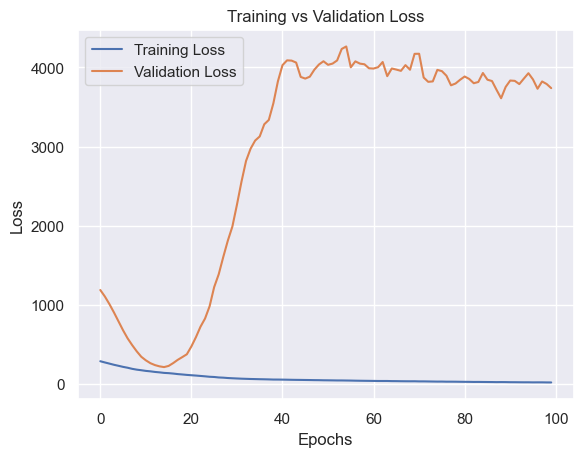

In [153]:
#通过绘图查看训练和验证损失是否趋于一致，从而判断是否缓解了过拟合。
import matplotlib.pyplot as plt

# 绘制训练集和验证集的损失变化
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()


In [161]:
# 测试模型
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss: {test_loss:.2f}, Test MAE: {test_mae:.2f}')


Test Loss: 781.85, Test MAE: 9.07


In [ ]:
#由于特征集较少（10个以下），使用PolynomialFeatures自动生成交互项更加高效，不需要提前筛选关键交互信息，不至于维度爆炸



In [163]:
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd

# 假设已有特征
features = ['population', 'gdp', 'gdp_per_capita', 'olympics_index', 'sports_index']
X = cleaned_data[features]

# 自动生成交互特征
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_interactions = poly.fit_transform(X)

# 获取交互特征的名称
interaction_feature_names = poly.get_feature_names_out(features)

# 创建带交互特征的新 DataFrame
X_interactions_df = pd.DataFrame(X_interactions, columns=interaction_feature_names)

# 查看生成的交互特征
print(X_interactions_df.head())


   population           gdp  gdp_per_capita  olympics_index  sports_index  \
0  45376763.0  3.830670e+11     8441.919439       19.597142      9.324537   
1   2963234.0  1.264546e+10     4267.452120       19.681457     13.497324   
2  25687041.0  1.330901e+12    51812.154037       31.170099     11.073845   
3   8917205.0  4.289654e+11    48105.364625       12.212139     15.923033   
4  10110116.0  4.260718e+10     4214.311336       18.213838     13.103344   

   population gdp  population gdp_per_capita  population olympics_index  \
0    1.738234e+19               3.830670e+11               8.892549e+08   
1    3.747145e+16               1.264546e+10               5.832076e+07   
2    3.418691e+19               1.330901e+12               8.006676e+08   
3    3.825172e+18               4.289654e+11               1.088981e+08   
4    4.307635e+17               4.260718e+10               1.841440e+08   

   population sports_index  gdp gdp_per_capita  gdp olympics_index  \
0             4.

In [169]:
#使用生成的交互特征数据进行训练和评估
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 定义目标变量
y = cleaned_data['total']

# 分割数据
X_train, X_test, y_train, y_test = train_test_split(X_interactions_df, y, test_size=0.2, random_state=42)

# 训练随机森林回归模型
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# 预测并评估
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)



print(f"Model with interactions - MAE: {mae:.2f}, MSE: {mse:.2f},R²: {r2:.2f}")


Model with interactions - MAE: 4.23, MSE: 40.64,R²: -0.20


                          Feature  Importance
10             gdp olympics_index    0.520935
9              gdp gdp_per_capita    0.135441
11               gdp sports_index    0.089199
1                             gdp    0.054173
6       population gdp_per_capita    0.042632
5                  population gdp    0.041838
7       population olympics_index    0.032029
8         population sports_index    0.015940
14    olympics_index sports_index    0.012785
3                  olympics_index    0.012649
4                    sports_index    0.011927
0                      population    0.009197
13    gdp_per_capita sports_index    0.008008
2                  gdp_per_capita    0.007454
12  gdp_per_capita olympics_index    0.005790


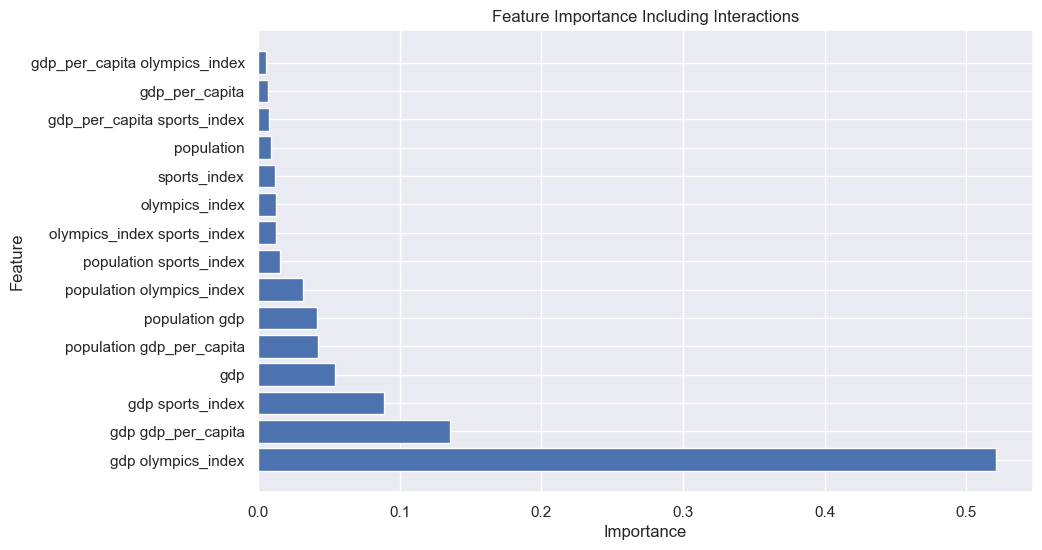

In [167]:
#特征重要性分析
# 提取特征重要性
import matplotlib.pyplot as plt

importance = model.feature_importances_
importance_df = pd.DataFrame({'Feature': interaction_feature_names, 'Importance': importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# 输出并可视化特征重要性
print(importance_df)
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Including Interactions')
plt.show()


Feature Loadings:
                     PC1       PC2       PC3
population      0.617178 -0.436693  0.028035
gdp             0.705288 -0.010391 -0.178776
gdp_per_capita  0.172261  0.702040 -0.605810
olympics_index  0.255302  0.555906  0.767629
sports_index   -0.163727 -0.085434 -0.104850


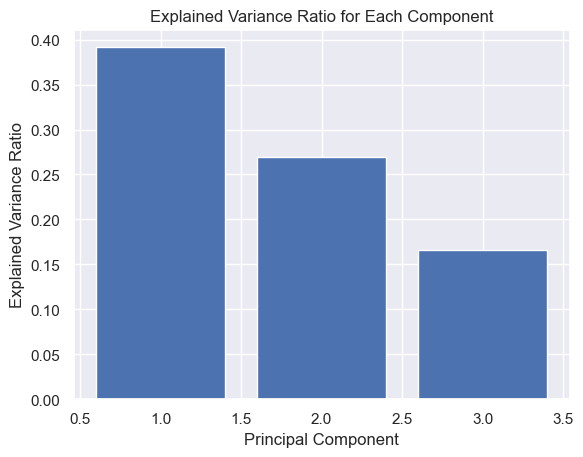

Explained Variance Ratio (PCA): [0.39162376 0.2698857  0.16601544]
Cumulative Variance Ratio: [0.39162376 0.66150946 0.8275249 ]
KNN Regression - MAE: 2.41, MSE: 15.64, R²: 0.54


In [181]:
#使用PCA和KNN，使用标准化数据集进行预测
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 假设 scaled_data 已经加载并包含特征和目标列
# 定义特征和目标
features = ['population', 'gdp', 'gdp_per_capita', 'olympics_index', 'sports_index']
target = 'total'

X = scaled_data[features]
y = scaled_data[target]

# 分割训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 应用 PCA 降维
pca = PCA(n_components=3)  # 降到 3 个主成分
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(3)], index=features)
print("Feature Loadings:")
print(loadings)

# 可视化方差解释率
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio for Each Component')
plt.show()

# 打印主成分方差解释率
print("Explained Variance Ratio (PCA):", pca.explained_variance_ratio_)
# 输出累积方差解释率
cumulative_variance = pca.explained_variance_ratio_.cumsum()
print("Cumulative Variance Ratio:", cumulative_variance)

# 使用 KNN 回归模型
knn = KNeighborsRegressor(n_neighbors=5)  # 默认使用 5 个邻居
knn.fit(X_train_pca, y_train)

# 预测测试集
y_pred = knn.predict(X_test_pca)

# 评估模型性能
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"KNN Regression - MAE: {mae:.2f}, MSE: {mse:.2f}, R²: {r2:.2f}")



#某一特征的载荷值越大，则对主成分的贡献越大
#例如PC1中population和gdp的载荷为0.617和0.705，说明这两个特征对PC1有最大贡献。因此人口和GDP可以被认为是影响奖牌数量预测的最具影响力指标


In [183]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': [3, 5, 7, 10, 15]}
grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(X_train_pca, y_train)

# 输出最佳参数
print("Best parameters:", grid_search.best_params_)

# 使用最佳参数重新训练
best_knn = grid_search.best_estimator_
y_pred_best = best_knn.predict(X_test_pca)


Best parameters: {'n_neighbors': 5}
